#Theoratical questions


### ✅ 1. **What is Boosting in Machine Learning?**

Boosting is an ensemble technique that combines several **weak learners** (usually decision trees) sequentially to create a **strong learner**, where each model focuses on correcting the errors made by the previous ones.

---

### ✅ 2. **How does Boosting differ from Bagging?**

* **Bagging** trains models **independently** and combines their outputs (e.g., Random Forest).
* **Boosting** trains models **sequentially**, each one improving the previous one’s mistakes.

---

### ✅ 3. **What is the key idea behind AdaBoost?**

AdaBoost gives **more weight** to misclassified instances so that the next weak learner focuses more on them. Final prediction is a **weighted vote** of all learners.

---

### ✅ 4. **Explain the working of AdaBoost with an example**

1. Start with equal weights for all data points.
2. Train a weak classifier (e.g., a small decision tree).
3. Increase weights of **misclassified points**.
4. Train the next classifier on the **updated weights**.
5. Repeat for several rounds.
6. Final output = **weighted sum of all classifiers**.

**Example:** If a tree misclassifies point A, its weight increases, so the next tree tries harder to classify A correctly.

---

### ✅ 5. **What is Gradient Boosting, and how is it different from AdaBoost?**

Gradient Boosting builds models **by minimizing a loss function** using gradient descent. Unlike AdaBoost, it fits new models to the **residuals (errors)** of previous models, not just adjusting sample weights.

---

### ✅ 6. **What is the loss function in Gradient Boosting?**

It depends on the task:

* **MSE (Mean Squared Error)** for regression
* **Log Loss** for classification
  The model is trained to minimize this loss using **gradient descent**.

---

### ✅ 7. **How does XGBoost improve over traditional Gradient Boosting?**

* Uses **regularization** to avoid overfitting
* **Parallel computation**
* Handles **missing values**
* Efficient **tree pruning**
* Faster and more scalable

---

### ✅ 8. **What is the difference between XGBoost and CatBoost?**

* **XGBoost** needs manual encoding for categorical data.
* **CatBoost** handles **categorical features automatically**, preserving ordering and reducing preprocessing effort.

---

### ✅ 9. **What are some real-world applications of Boosting techniques?**

* **Fraud detection**
* **Click-through rate prediction**
* **Medical diagnosis**
* **Credit scoring**
* **Image and text classification**

---

### ✅ 10. **How does regularization help in XGBoost?**

It adds **penalty terms** to the objective function to reduce model complexity, helping prevent **overfitting** and improving **generalization**.

---

### ✅ 11. **What are some hyperparameters to tune in Gradient Boosting models?**

* `n_estimators` (number of trees)
* `learning_rate` (step size)
* `max_depth` (depth of trees)
* `subsample` (data sampling)
* `colsample_bytree` (feature sampling)
* `min_child_weight`, `gamma`, `lambda`, `alpha` (regularization)

---

### ✅ 12. **What is the concept of Feature Importance in Boosting?**

It shows how much each feature contributes to reducing the model’s loss. Features used in **more splits** with **larger gain** are more important.

---

### ✅ 13. **Why is CatBoost efficient for categorical data?**

It uses **ordered boosting** and **target-based encoding** to handle categorical variables **without data leakage** and with minimal preprocessing, making it efficient and accurate.



#Practical questions

In [2]:
# 14. Train an AdaBoost Classifier on a sample dataset and print model accuracy

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)

y_pred = adaboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.8650


In [4]:
# 15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)

from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

X_reg = np.random.rand(1000, 10)
y_reg = np.random.rand(1000) * 100

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

adaboost_reg_model = AdaBoostRegressor(n_estimators=100, random_state=42)
adaboost_reg_model.fit(X_train_reg, y_train_reg)

y_pred_reg = adaboost_reg_model.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 24.0518


In [5]:
# 16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
feature_names = breast_cancer.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

feature_importance = gb_model.feature_importances_

feature_importance_dict = dict(zip(feature_names, feature_importance))

sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

print("Feature Importances:")
for feature, importance in sorted_feature_importance:
  print(f"{feature}: {importance:.4f}")


Feature Importances:
mean concave points: 0.4505
worst concave points: 0.2401
worst radius: 0.0756
worst perimeter: 0.0514
worst texture: 0.0399
worst area: 0.0382
mean texture: 0.0278
worst concavity: 0.0187
concavity error: 0.0131
area error: 0.0084
radius error: 0.0069
worst smoothness: 0.0048
fractal dimension error: 0.0042
texture error: 0.0036
mean compactness: 0.0030
compactness error: 0.0025
mean smoothness: 0.0025
concave points error: 0.0020
worst symmetry: 0.0015
perimeter error: 0.0012
mean concavity: 0.0009
symmetry error: 0.0007
smoothness error: 0.0006
mean symmetry: 0.0005
worst compactness: 0.0005
mean area: 0.0004
mean perimeter: 0.0002
worst fractal dimension: 0.0002
mean fractal dimension: 0.0001
mean radius: 0.0000


In [6]:
# 17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import train_test_split

X_reg = np.random.rand(1000, 10)
y_reg = np.random.rand(1000) * 100

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

gb_reg_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg_model.fit(X_train_reg, y_train_reg)

y_pred_reg = gb_reg_model.predict(X_test_reg)

r2 = r2_score(y_test_reg, y_pred_reg)
print(f"R-Squared Score: {r2:.4f}")


R-Squared Score: -0.0491


In [7]:
# 18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting

!pip install xgboost

import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb:.4f}")

y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gb:.4f}")

print("\nComparison:")
if accuracy_xgb > accuracy_gb:
  print("XGBoost has higher accuracy.")
elif accuracy_gb > accuracy_xgb:
  print("Gradient Boosting has higher accuracy.")
else:
  print("Both models have the same accuracy.")


XGBoost Classifier Accuracy: 0.9561
Gradient Boosting Classifier Accuracy: 0.9561

Comparison:
Both models have the same accuracy.


In [8]:
# 19. Train a CatBoost Classifier and evaluate using F1-Score

!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)

y_pred_catboost = catboost_model.predict(X_test)

f1 = f1_score(y_test, y_pred_catboost)
print(f"CatBoost Classifier F1-score: {f1:.4f}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.6 MB/s eta 0:00:00
CatBoost Classifier F1-score: 0.9722


In [10]:
# 20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)

import numpy as np
from sklearn.metrics import mean_squared_error

X_reg = np.random.rand(1000, 10)
y_reg = np.random.rand(1000) * 100

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

xgb_reg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_reg_model.fit(X_train_reg, y_train_reg)

y_pred_reg = xgb_reg_model.predict(X_test_reg)

mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"XGBoost Regressor Mean Squared Error (MSE): {mse:.4f}")

XGBoost Regressor Mean Squared Error (MSE): 904.9583


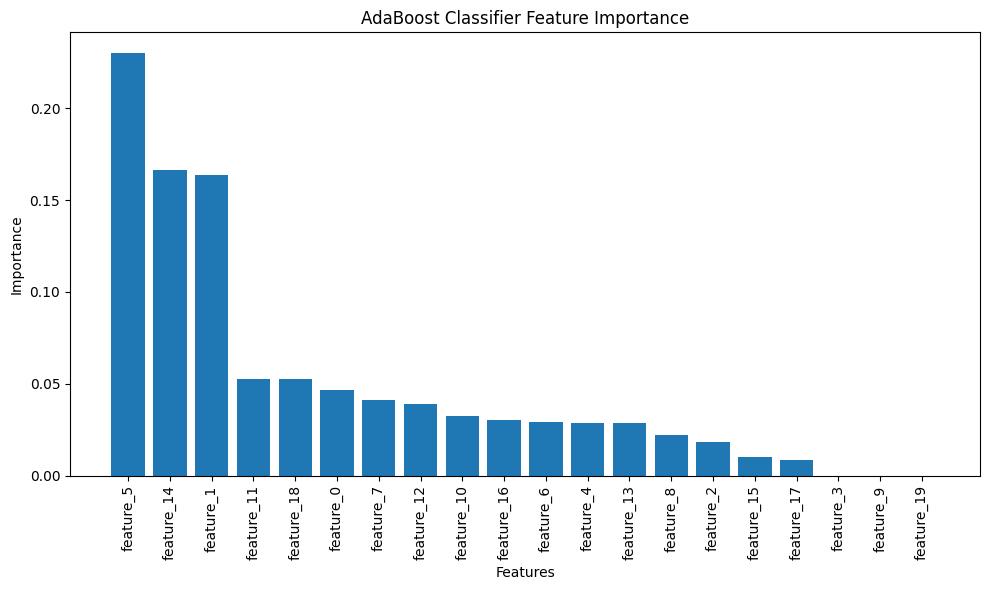

In [11]:
# 21. Train an AdaBoost Classifier and visualize feature importance

import matplotlib.pyplot as plt

feature_names = [f'feature_{i}' for i in range(X.shape[1])]

feature_importance = adaboost_model.feature_importances_

feature_importance_dict = dict(zip(feature_names, feature_importance))

sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

sorted_features = [item[0] for item in sorted_feature_importance]
sorted_importances = [item[1] for item in sorted_feature_importance]

plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importances)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("AdaBoost Classifier Feature Importance")
plt.tight_layout()
plt.show()

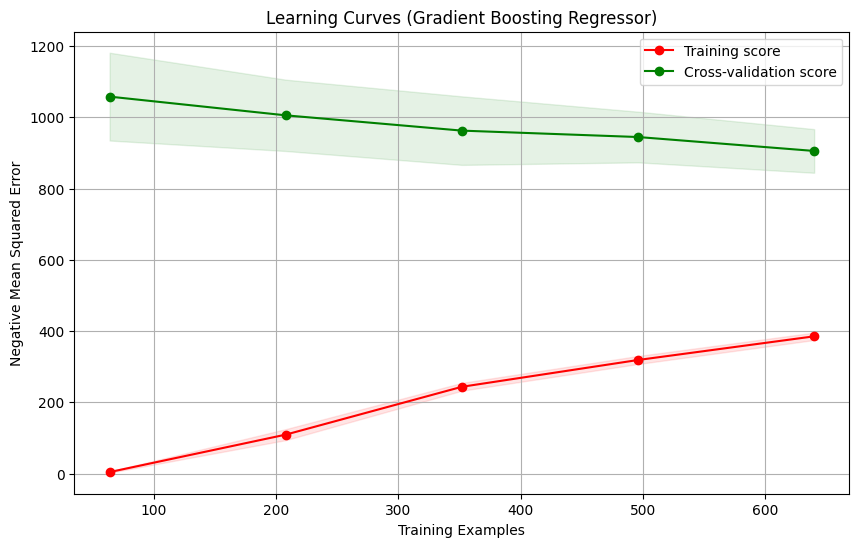

In [12]:
# 22. Train a Gradient Boosting Regressor and plot learning curves

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(gb_reg_model, X_train_reg, y_train_reg, cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curves (Gradient Boosting Regressor)")
plt.xlabel("Training Examples")
plt.ylabel("Negative Mean Squared Error")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

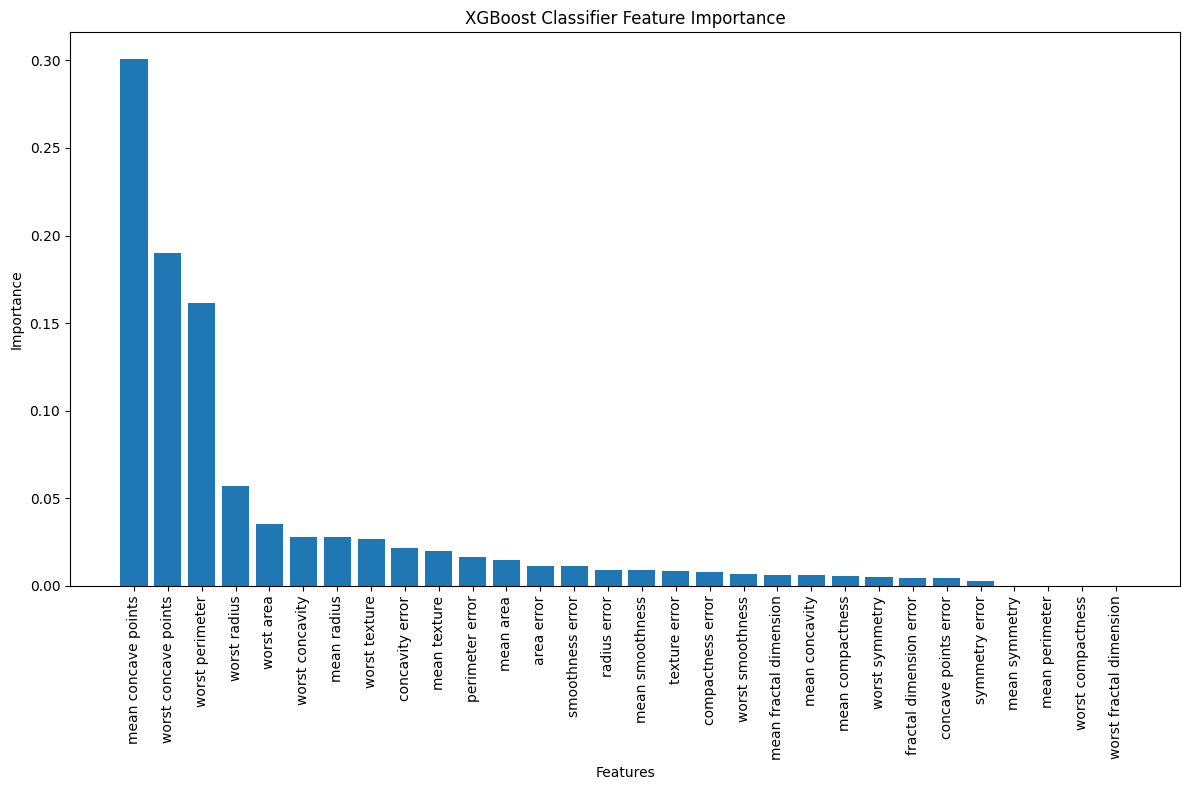

In [13]:
# 23. Train an XGBoost Classifier and visualize feature importance

import matplotlib.pyplot as plt

breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
feature_names = breast_cancer.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

feature_importance = xgb_model.feature_importances_

feature_importance_dict = dict(zip(feature_names, feature_importance))

sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

sorted_features = [item[0] for item in sorted_feature_importance]
sorted_importances = [item[1] for item in sorted_feature_importance]

plt.figure(figsize=(12, 8))
plt.bar(sorted_features, sorted_importances)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("XGBoost Classifier Feature Importance")
plt.tight_layout()
plt.show()

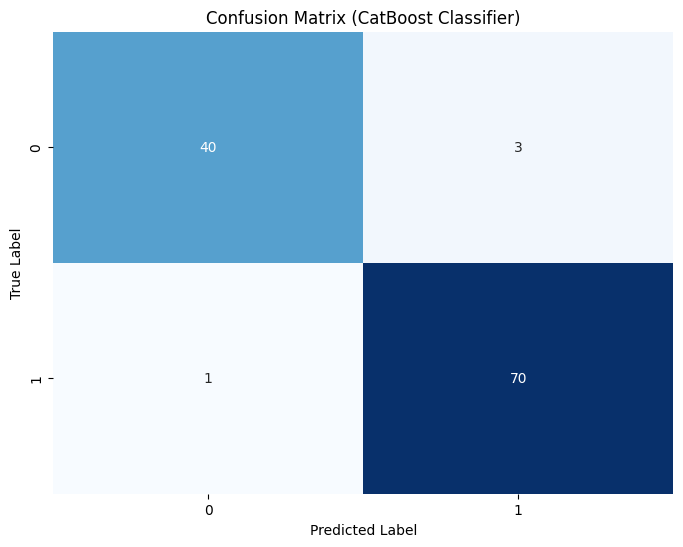

In [14]:
# 24. Train a CatBoost Classifier and plot the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred_catboost = catboost_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_catboost)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (CatBoost Classifier)')
plt.show()


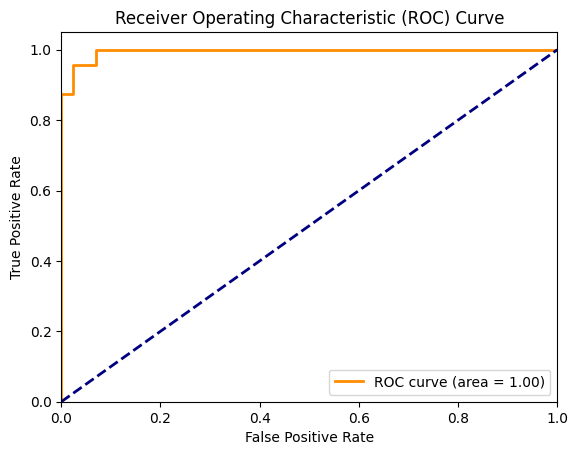

In [15]:
# 26. Train a Gradient Boosting Classifier and visualize the ROC curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_proba = gb_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [16]:
# 27.  Train an XGBoost Regressor and tune the learning rate using GridSearchCV

from sklearn.model_selection import GridSearchCV
import pandas as pd

param_grid = {
  'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
}

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, random_state=42)

grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1)

grid_search.fit(X_train_reg, y_train_reg)

print("Best parameters found: ", grid_search.best_params_)

best_xgb_reg_model = grid_search.best_estimator_

y_pred_reg_tuned = best_xgb_reg_model.predict(X_test_reg)
mse_tuned = mean_squared_error(y_test_reg, y_pred_reg_tuned)
print(f"Tuned XGBoost Regressor Mean Squared Error (MSE): {mse_tuned:.4f}")

cv_results = pd.DataFrame(grid_search.cv_results_)
print("\nGrid Search Results:")
print(cv_results[['param_learning_rate', 'mean_test_score', 'std_test_score']])


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found:  {'learning_rate': 0.01}
Tuned XGBoost Regressor Mean Squared Error (MSE): 822.6587

Grid Search Results:
   param_learning_rate  mean_test_score  std_test_score
0                 0.01      -856.304257       62.775851
1                 0.05      -887.342952       59.923173
2                 0.10      -892.583279       57.077330
3                 0.20      -964.368734       51.891524
4                 0.30     -1024.185827       73.857170


CatBoost (No Class Weight) F1-score: 0.3750
CatBoost (With Class Weight) F1-score: 0.3158

Comparison of F1-scores on Imbalanced Dataset:
CatBoost without class weighting performs better.


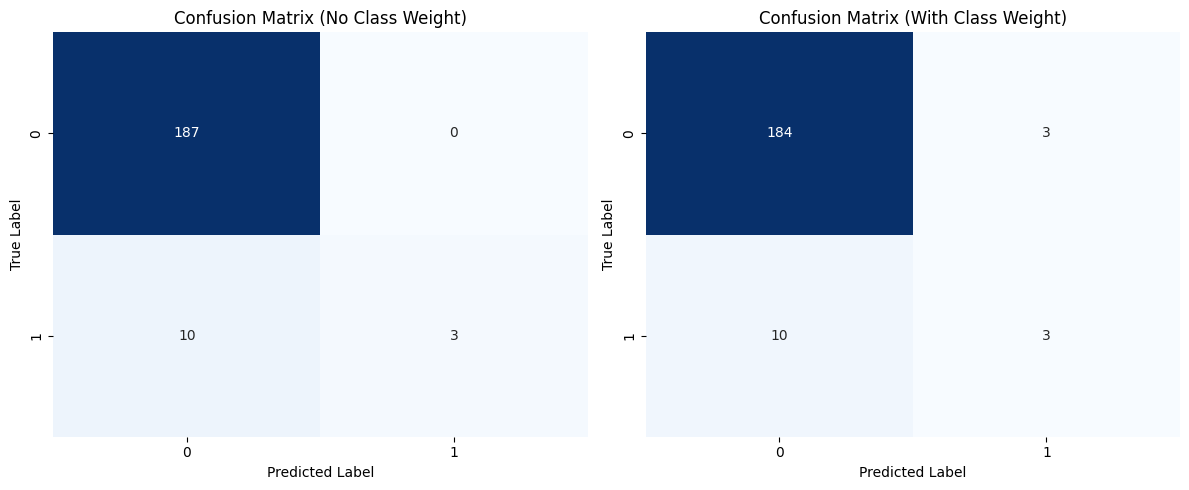

In [17]:
# 28.  Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting

import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_samples=1000, n_features=20, weights=[0.95], flip_y=0.05, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

catboost_model_no_weight = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42, verbose=0)
catboost_model_no_weight.fit(X_train, y_train)

y_pred_no_weight = catboost_model_no_weight.predict(X_test)

f1_no_weight = f1_score(y_test, y_pred_no_weight)
print(f"CatBoost (No Class Weight) F1-score: {f1_no_weight:.4f}")

class_counts = np.bincount(y_train)

scale_pos_weight = class_counts[0] / class_counts[1]

catboost_model_weighted = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42, verbose=0, scale_pos_weight=scale_pos_weight)
catboost_model_weighted.fit(X_train, y_train)

y_pred_weighted = catboost_model_weighted.predict(X_test)

f1_weighted = f1_score(y_test, y_pred_weighted)
print(f"CatBoost (With Class Weight) F1-score: {f1_weighted:.4f}")

print("\nComparison of F1-scores on Imbalanced Dataset:")
if f1_weighted > f1_no_weight:
  print("CatBoost with class weighting performs better.")
elif f1_no_weight > f1_weighted:
  print("CatBoost without class weighting performs better.")
else:
  print("Both models have similar F1-scores.")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_no_weight = confusion_matrix(y_test, y_pred_no_weight)
sns.heatmap(cm_no_weight, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_title('Confusion Matrix (No Class Weight)')

cm_weighted = confusion_matrix(y_test, y_pred_weighted)
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_title('Confusion Matrix (With Class Weight)')

plt.tight_layout()
plt.show()

Learning Rate: 0.01, Accuracy: 0.8600
Learning Rate: 0.05, Accuracy: 0.8600
Learning Rate: 0.10, Accuracy: 0.8600
Learning Rate: 0.20, Accuracy: 0.8600
Learning Rate: 0.50, Accuracy: 0.8700
Learning Rate: 1.00, Accuracy: 0.8650


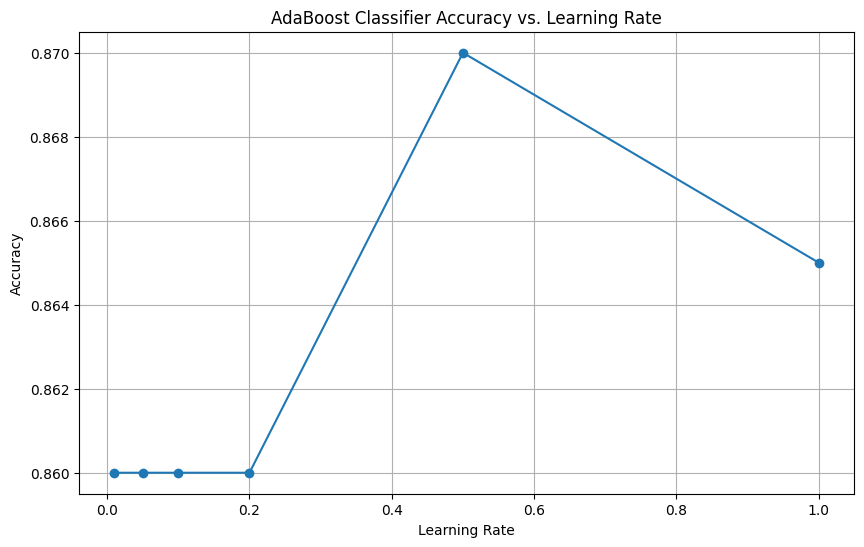

In [18]:
# 25. Train an AdaBoost Classifier and analyze the effect of different learning rates

import matplotlib.pyplot as plt
# 25. Train an AdaBoost Classifier and analyze the effect of different learning rates


learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5, 1.0]
accuracies = []

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for lr in learning_rates:
  adaboost_model = AdaBoostClassifier(n_estimators=100, learning_rate=lr, random_state=42)
  adaboost_model.fit(X_train, y_train)
  y_pred = adaboost_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)
  print(f"Learning Rate: {lr:.2f}, Accuracy: {accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(learning_rates, accuracies, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("AdaBoost Classifier Accuracy vs. Learning Rate")
plt.grid(True)
plt.show()

In [19]:
# 30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=3, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

xgb_model_multiclass = xgb.XGBClassifier(objective='multi:softprob', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, num_class=3)
xgb_model_multiclass.fit(X_train, y_train)

y_pred_proba_multiclass = xgb_model_multiclass.predict_proba(X_test)

logloss = log_loss(y_test, y_pred_proba_multiclass)

print(f"XGBoost Classifier Log-Loss (Multi-class): {logloss:.4f}")

XGBoost Classifier Log-Loss (Multi-class): 0.1844
